In [1]:
# 공공 데이터 활용, 데이터 전처리 실습 문제
# https://www.data.go.kr/ 에서 제공하는 공공데이터를 활용

In [3]:
# 1. 데이터프레임 로드

In [41]:
# pnadas 라이브러리 임폴트
import pandas as pd

In [480]:
# csv 파일 데이터프레임 만들기
file_path = "datas/house_price.csv"

In [481]:
df = pd.read_csv(file_path)
df

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4500,제주,전체,2020,2,3955
4501,제주,전용면적 60㎡이하,2020,2,4039
4502,제주,전용면적 60㎡초과 85㎡이하,2020,2,3962
4503,제주,전용면적 85㎡초과 102㎡이하,2020,2,NaN


In [7]:
# column 재정의 (rename)
# 전체 column의 이름 변경 : df.columns 사용
# 한 개의 column 이름 변경 : df.rename(columns={'원 컬럼명':'수정할 컬럼명'})

In [482]:
# 분양가격 column의 이름을 재정의
df.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)'], dtype='object')

In [483]:
df.rename(columns={'분양가격(㎡)':'분양가격'},inplace=True)
df.head()

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [13]:
# 3. 데이터 살펴보기

In [484]:
# 3-1. 결측치 및 Data Type 확인하기
# 데이터프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     4505 non-null   object
 1   규모구분    4505 non-null   object
 2   연도      4505 non-null   int64 
 3   월       4505 non-null   int64 
 4   분양가격    4210 non-null   object
dtypes: int64(2), object(3)
memory usage: 176.1+ KB


In [485]:
# 3-2. 기술 통계값 확인
# 기술 통계값 확인
df.describe()

,연도,월
count,4505.000000,4505.000000
mean,2017.452830,6.566038
std,1.311432,3.595519
min,2015.000000,1.000000
25%,2016.000000,3.000000
50%,2017.000000,7.000000
75%,2019.000000,10.000000
max,2020.000000,12.000000


In [486]:
# 4. 분양가격 column을 int 타입으로 변환 (실전 전처리)
# 분양가격 컬럼을 object -> int 타입으로 변경하려고 합니다.
# 아래 셀을 실행하면 error가 납니다. error가 나지 않도록 전처리를 해봅시다.
df.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격'], dtype='object')

In [487]:
df['분양가격'].astype(int)

ValueError: invalid literal for int() with base 10: '  '

In [20]:
# strip()을 활용하여 공백이 있는 데이터 공백없애기
# [tip] column의 문자열에 strip을 실행하고자 할 때는 str.strip()를 실행해줘야 함.
# [예시] df['분양가격'].str.strip()

In [488]:
# 4-1 '분양가격' 컬럼에 '   ' 공백이 있는 데이터들이 있는지 확인해 보기
null = ['  ']
df.loc[df['분양가격'].isin(null)]

,지역명,규모구분,연도,월,분양가격
28,광주,전용면적 85㎡초과 102㎡이하,2015,10,
29,광주,전용면적 102㎡초과,2015,10,
34,대전,전용면적 102㎡초과,2015,10,
81,제주,전용면적 60㎡이하,2015,10,
113,광주,전용면적 85㎡초과 102㎡이하,2015,11,
114,광주,전용면적 102㎡초과,2015,11,
119,대전,전용면적 102㎡초과,2015,11,
166,제주,전용면적 60㎡이하,2015,11,
198,광주,전용면적 85㎡초과 102㎡이하,2015,12,
199,광주,전용면적 102㎡초과,2015,12,


In [22]:
# 4-2 '분양가격' column에 공백 제거하고 확인하기

In [489]:
# 공백 제거
df['분양가격'] = df['분양가격'].str.strip()
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4500,제주,전체,2020,2,3955
4501,제주,전용면적 60㎡이하,2020,2,4039
4502,제주,전용면적 60㎡초과 85㎡이하,2020,2,3962
4503,제주,전용면적 85㎡초과 102㎡이하,2020,2,NaN


In [490]:
df['분양가격'].isnull().sum()

295

In [491]:
df['분양가격'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4500    False
4501    False
4502    False
4503     True
4504    False
Name: 분양가격, Length: 4505, dtype: bool

In [492]:
# 4-3 '분양가격' 컬럼에 공백이 있는경우, 0으로 대입하고, int형으로 변경해보기
# 분양가격 컬럼에 공백인 곳에 0으로 채우기
df.loc[df['분양가격'] == '', '분양가격'] = 0
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4500,제주,전체,2020,2,3955
4501,제주,전용면적 60㎡이하,2020,2,4039
4502,제주,전용면적 60㎡초과 85㎡이하,2020,2,3962
4503,제주,전용면적 85㎡초과 102㎡이하,2020,2,NaN


In [493]:
# 분양가격을 int형으로 변경해보기
df['분양가격'].astype(int)

ValueError: cannot convert float NaN to integer

In [494]:
# 4-4 NaN 값은 0으로 채우고, 다시 int로 형변환하기
# NaN 값 0으로 채우기
# df['분양가격']
# df.loc[:, "분양가격"]
df['분양가격'] = df['분양가격'].fillna(0)
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4500,제주,전체,2020,2,3955
4501,제주,전용면적 60㎡이하,2020,2,4039
4502,제주,전용면적 60㎡초과 85㎡이하,2020,2,3962
4503,제주,전용면적 85㎡초과 102㎡이하,2020,2,0


In [495]:
# int로 다시 형변환 해보기
df['분양가격'].astype(int)

ValueError: invalid literal for int() with base 10: '6,657'

In [496]:
# 4-5 위에 나타난 에러에 표시된 데이터 행 확인하고, 제거하기
df['분양가격'] = df['분양가격'].str.replace(',', '')
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4500,제주,전체,2020,2,3955
4501,제주,전용면적 60㎡이하,2020,2,4039
4502,제주,전용면적 60㎡초과 85㎡이하,2020,2,3962
4503,제주,전용면적 85㎡초과 102㎡이하,2020,2,NaN


In [497]:
# int로 다시 형변환 해보기
df['분양가격'].astype(int)

ValueError: cannot convert float NaN to integer

In [498]:
df['분양가격'] = df['분양가격'].str.replace('-', '')
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4500,제주,전체,2020,2,3955
4501,제주,전용면적 60㎡이하,2020,2,4039
4502,제주,전용면적 60㎡초과 85㎡이하,2020,2,3962
4503,제주,전용면적 85㎡초과 102㎡이하,2020,2,NaN


In [499]:
df['분양가격'] = df['분양가격'].fillna(0)
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4500,제주,전체,2020,2,3955
4501,제주,전용면적 60㎡이하,2020,2,4039
4502,제주,전용면적 60㎡초과 85㎡이하,2020,2,3962
4503,제주,전용면적 85㎡초과 102㎡이하,2020,2,0


In [500]:
df.loc[df['분양가격'] == '', '분양가격'] = 0
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4500,제주,전체,2020,2,3955
4501,제주,전용면적 60㎡이하,2020,2,4039
4502,제주,전용면적 60㎡초과 85㎡이하,2020,2,3962
4503,제주,전용면적 85㎡초과 102㎡이하,2020,2,0


In [501]:
# int로 다시 형변환 해보기
df['분양가격'].astype(int)

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
4500    3955
4501    4039
4502    3962
4503       0
4504    3601
Name: 분양가격, Length: 4505, dtype: int32

In [502]:
# 4-6 데이터 프레임에 null 값이 있는지 확인해보기
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   지역명     4505 non-null   bool 
 1   규모구분    4505 non-null   bool 
 2   연도      4505 non-null   bool 
 3   월       4505 non-null   bool 
 4   분양가격    4505 non-null   bool 
dtypes: bool(5)
memory usage: 22.1 KB


In [529]:
# NonNull은 데이터값이 Null이면 안된다. Null이면 에러를 반환한다.
# NotEmpty는 데이터값이 Null, ""(빈 문자열)이면 안된다.
# NotBlank는 데이터값이 Null, "", " "(공백) 이면 안된다.

In [503]:
# 4-7 '규모구분' column에 '전용면적'이 불필요하다고 생각되어 제거 함.
df['규모구분'] = df['규모구분'].str.replace('전용면적', '')
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879
...,...,...,...,...,...
4500,제주,전체,2020,2,3955
4501,제주,60㎡이하,2020,2,4039
4502,제주,60㎡초과 85㎡이하,2020,2,3962
4503,제주,85㎡초과 102㎡이하,2020,2,0


In [504]:
df.head()

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879


In [505]:
df['규모구분'].value_counts()

규모구분
전체               901
 60㎡이하           901
 60㎡초과 85㎡이하     901
 85㎡초과 102㎡이하    901
 102㎡초과          901
Name: count, dtype: int64

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     4505 non-null   object
 1   규모구분    4505 non-null   object
 2   연도      4505 non-null   int64 
 3   월       4505 non-null   int64 
 4   분양가격    4505 non-null   object
dtypes: int64(2), object(3)
memory usage: 176.1+ KB


In [507]:
# 5. 전처리가 완료된 데이터 셋 저장하기
# datas/house_price_ok.csv 파일명으로 저장하기
# index는 저장하지 않기
file_path = "datas/house_price_ok.csv"
df.to_csv(file_path, index=False)

In [508]:
# 6. file_path에 저장한 파일 불러서 데이터 프레임으로 만들기
file_path = "datas/house_price_ok.csv"
df = pd.read_csv(file_path)
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879
...,...,...,...,...,...
4500,제주,전체,2020,2,3955
4501,제주,60㎡이하,2020,2,4039
4502,제주,60㎡초과 85㎡이하,2020,2,3962
4503,제주,85㎡초과 102㎡이하,2020,2,0


In [509]:
# 7. 지역명을 그룹으로 평균 분양가격 확인하기
df.groupby('지역명')['분양가격'].mean()

지역명
강원    2339.807547
경기    4072.667925
경남    2761.275472
경북    2432.128302
광주    2450.728302
대구    3538.920755
대전    2479.135849
부산    3679.920755
서울    7225.762264
세종    2815.098113
울산    1826.101887
인천    3578.433962
전남    2270.177358
전북    2322.060377
제주    2979.407547
충남    2388.324528
충북    2316.871698
Name: 분양가격, dtype: float64

In [ ]:
# 8. 분양가격이 100보다 작은 행은 제거해 보기
# [tip] 특정 조건에 만족하는 행을 제거하고자 할 때는
# index를 list로 가져온다
# drop을 활용하여 행을 제거한다

In [510]:
# '분양가격'이 100보다 작은 값 확인하기
df[df['분양가격'] < 100]

,지역명,규모구분,연도,월,분양가격
28,광주,85㎡초과 102㎡이하,2015,10,0
29,광주,102㎡초과,2015,10,0
34,대전,102㎡초과,2015,10,0
81,제주,60㎡이하,2015,10,0
113,광주,85㎡초과 102㎡이하,2015,11,0
...,...,...,...,...,...
4461,세종,60㎡이하,2020,2,0
4488,전남,85㎡초과 102㎡이하,2020,2,0
4493,경북,85㎡초과 102㎡이하,2020,2,0
4499,경남,102㎡초과,2020,2,0


In [511]:
# 분양가격 컬럼의 값이 100보다 작은 행 index 목록 추출하기
idx = df[df['분양가격'] < 100].index
idx

Index([  28,   29,   34,   81,  113,  114,  119,  166,  198,  199,
       ...
       4418, 4448, 4453, 4458, 4459, 4461, 4488, 4493, 4499, 4503],
      dtype='int64', length=320)

In [512]:
# index를 행 기준으로 drop하기
df = df.drop(idx, axis=0)

In [513]:
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879
...,...,...,...,...,...
4498,경남,85㎡초과 102㎡이하,2020,2,3247
4500,제주,전체,2020,2,3955
4501,제주,60㎡이하,2020,2,4039
4502,제주,60㎡초과 85㎡이하,2020,2,3962


In [514]:
df.count()

지역명     4185
규모구분    4185
연도      4185
월       4185
분양가격    4185
dtype: int64

In [515]:
# 9. 다시 한 번 지역명을 group으로 묶어 확인하기
# 지역명을 group으로 묶어 분양가격의 평균 확인하기
df.groupby('지역명', )['분양가격'].mean()

지역명
강원    2412.642023
경기    4072.667925
경남    2814.376923
경북    2547.486166
광주    3049.028169
대구    3663.335938
대전    3128.433333
부산    3679.920755
서울    7225.762264
세종    2984.004000
울산    3043.503145
인천    3633.275862
전남    2304.969349
전북    2348.648855
제주    3432.795652
충남    2501.604743
충북    2316.871698
Name: 분양가격, dtype: float64

In [516]:
# 지역명으로 group으로 묶어서 분양가격의 평균을 내림차수로 확인하기
df.groupby('지역명')['분양가격'].mean().sort_values(ascending=False)

지역명
서울    7225.762264
경기    4072.667925
부산    3679.920755
대구    3663.335938
인천    3633.275862
제주    3432.795652
대전    3128.433333
광주    3049.028169
울산    3043.503145
세종    2984.004000
경남    2814.376923
경북    2547.486166
충남    2501.604743
강원    2412.642023
전북    2348.648855
충북    2316.871698
전남    2304.969349
Name: 분양가격, dtype: float64

In [517]:
# 지역명을 group으로 묶어 분양가격의 갯수 확인하기
df.groupby("지역명")["분양가격"].count()

지역명
강원    257
경기    265
경남    260
경북    253
광주    213
대구    256
대전    210
부산    265
서울    265
세종    250
울산    159
인천    261
전남    261
전북    262
제주    230
충남    253
충북    265
Name: 분양가격, dtype: int64

In [518]:
# 지역명을 group으로 묶어서 분양가격의 갯수를 내림차수로 확인하기
df.groupby("지역명")["분양가격"].count().sort_values(ascending=False)

지역명
서울    265
부산    265
경기    265
충북    265
전북    262
인천    261
전남    261
경남    260
강원    257
대구    256
경북    253
충남    253
세종    250
제주    230
광주    213
대전    210
울산    159
Name: 분양가격, dtype: int64

In [519]:
# 지역 별로 가장 비싼 분양가 확인해보기
df.groupby("지역명")["분양가격"].max()

지역명
강원     3906
경기     5670
경남     4303
경북     3457
광주     4881
대구     5158
대전     4877
부산     4623
서울    13835
세종     3931
울산     3594
인천     5188
전남     3053
전북     3052
제주     5462
충남     3201
충북     2855
Name: 분양가격, dtype: int64

In [520]:
# 10. 연도별로 분양가격 확인하기
df.groupby("연도")['분양가격'].mean()

연도
2015    2788.707819
2016    2934.250000
2017    3143.311795
2018    3326.951034
2019    3693.422149
2020    3853.960526
Name: 분양가격, dtype: float64

In [521]:
# 11. 피벗 테이블 활용해보기
df_pt = pd.pivot_table(df, index='연도', columns='규모구분', values='분양가격')
df_pt

규모구분,102㎡초과,60㎡이하,60㎡초과 85㎡이하,85㎡초과 102㎡이하,전체
연도,,,,,
2015,2980.977778,2712.583333,2694.490196,2884.395833,2694.862745
2016,3148.099476,2848.144279,2816.965686,3067.380435,2816.073529
2017,3427.649746,3112.538071,2981.950980,3204.075145,3008.279412
2018,3468.355932,3286.184783,3227.458128,3467.184211,3235.098522
2019,4039.854839,3486.910112,3538.545918,3933.538462,3515.974490
2020,4187.566667,3615.968750,3594.852941,4532.090909,3603.911765


In [522]:
# 데이터 프레임의 데이터를 소숫점 2자리까지만 출력하기
df_pt = round(pd.pivot_table(df, index='연도', columns='규모구분', values='분양가격'),2)
df_pt

규모구분,102㎡초과,60㎡이하,60㎡초과 85㎡이하,85㎡초과 102㎡이하,전체
연도,,,,,
2015,2980.98,2712.58,2694.49,2884.40,2694.86
2016,3148.10,2848.14,2816.97,3067.38,2816.07
2017,3427.65,3112.54,2981.95,3204.08,3008.28
2018,3468.36,3286.18,3227.46,3467.18,3235.10
2019,4039.85,3486.91,3538.55,3933.54,3515.97
2020,4187.57,3615.97,3594.85,4532.09,3603.91


In [ ]:
# 12. 년도에 따른 평형대의 변화 추이를 보기위해 시각화 하기

In [523]:
# 현재 시스템의 설치 폰트 목록 확인
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]
print()

In [524]:
import matplotlib.pylab as plt
# - 깨짐 해결 모듈
import matplotlib as mpl

# 차트 설정
plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12,6)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


In [525]:
# 데이터프레임 로드
import pandas as pd
import matplotlib.pyplot as plt

<Axes: xlabel='연도'>

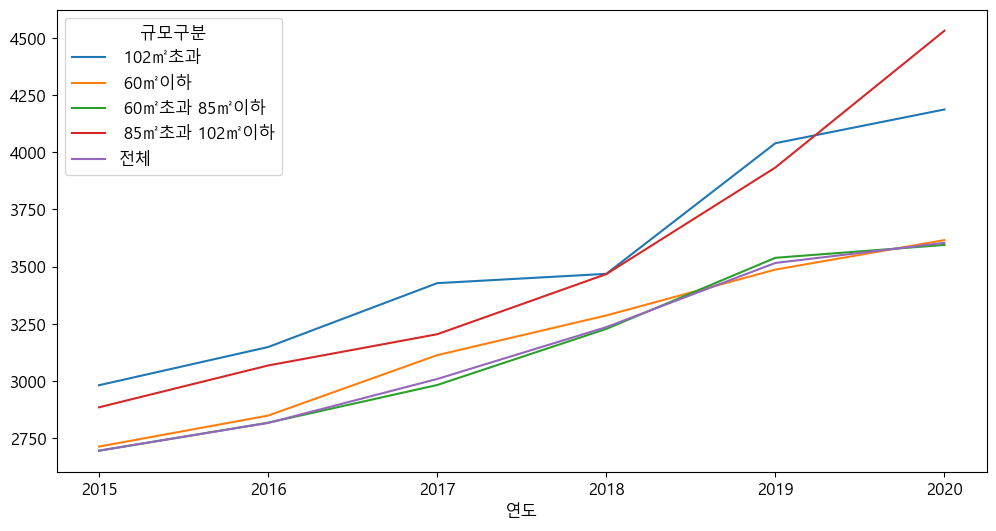

In [526]:
df_pt.plot()

In [527]:
# 13. 연도별, 규모별 가격을 알아볼까요? (multi-index)
# 평균의 출력 형태는 소숫점 2자리까지
df_pt.stack()

연도    규모구분         
2015   102㎡초과          2980.98
       60㎡이하           2712.58
       60㎡초과 85㎡이하     2694.49
       85㎡초과 102㎡이하    2884.40
      전체               2694.86
2016   102㎡초과          3148.10
       60㎡이하           2848.14
       60㎡초과 85㎡이하     2816.97
       85㎡초과 102㎡이하    3067.38
      전체               2816.07
2017   102㎡초과          3427.65
       60㎡이하           3112.54
       60㎡초과 85㎡이하     2981.95
       85㎡초과 102㎡이하    3204.08
      전체               3008.28
2018   102㎡초과          3468.36
       60㎡이하           3286.18
       60㎡초과 85㎡이하     3227.46
       85㎡초과 102㎡이하    3467.18
      전체               3235.10
2019   102㎡초과          4039.85
       60㎡이하           3486.91
       60㎡초과 85㎡이하     3538.55
       85㎡초과 102㎡이하    3933.54
      전체               3515.97
2020   102㎡초과          4187.57
       60㎡이하           3615.97
       60㎡초과 85㎡이하     3594.85
       85㎡초과 102㎡이하    4532.09
      전체               3603.91
dtype: float64

In [528]:
# 14. 위의 결과를 보기좋게 하기위해 데이터프레임으로 표현하기
# 분양가격은 소숫점 2자리까지 표시하기
df_m = df.groupby(['연도','규모구분'])[['분양가격']].mean()
round(df_m,2)

분양가격
연도   규모구분                  
2015  102㎡초과        2980.98
      60㎡이하         2712.58
      60㎡초과 85㎡이하   2694.49
      85㎡초과 102㎡이하  2884.40
     전체             2694.86
2016  102㎡초과        3148.10
      60㎡이하         2848.14
      60㎡초과 85㎡이하   2816.97
      85㎡초과 102㎡이하  3067.38
     전체             2816.07
2017  102㎡초과        3427.65
      60㎡이하         3112.54
      60㎡초과 85㎡이하   2981.95
      85㎡초과 102㎡이하  3204.08
     전체             3008.28
2018  102㎡초과        3468.36
      60㎡이하         3286.18
      60㎡초과 85㎡이하   3227.46
      85㎡초과 102㎡이하  3467.18
     전체             3235.10
2019  102㎡초과        4039.85
      60㎡이하         3486.91
      60㎡초과 85㎡이하   3538.55
      85㎡초과 102㎡이하  3933.54
     전체             3515.97
2020  102㎡초과        4187.57
      60㎡이하         3615.97
      60㎡초과 85㎡이하   3594.85
      85㎡초과 102㎡이하  4532.09
     전체             3603.91